In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats

from pymining import itemmining

%matplotlib inline

In [206]:
dfJan = pd.read_csv("data/chicago_taxi_trips_2016_01.csv")
dfFeb = pd.read_csv("data/chicago_taxi_trips_2016_02.csv")
dfMar = pd.read_csv("data/chicago_taxi_trips_2016_03.csv")
dfApr = pd.read_csv("data/chicago_taxi_trips_2016_04.csv")
dfMay = pd.read_csv("data/chicago_taxi_trips_2016_05.csv")
dfJun = pd.read_csv("data/chicago_taxi_trips_2016_06.csv")
dfJul = pd.read_csv("data/chicago_taxi_trips_2016_07.csv")
dfAug = pd.read_csv("data/chicago_taxi_trips_2016_08.csv")
dfSep = pd.read_csv("data/chicago_taxi_trips_2016_09.csv")
dfOct = pd.read_csv("data/chicago_taxi_trips_2016_10.csv")
dfNov = pd.read_csv("data/chicago_taxi_trips_2016_11.csv")
dfDec = pd.read_csv("data/chicago_taxi_trips_2016_12.csv")

In [3]:
dfOct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499771 entries, 0 to 1499770
Data columns (total 20 columns):
taxi_id                   1499330 non-null float64
trip_start_timestamp      1499771 non-null object
trip_end_timestamp        1499694 non-null object
trip_seconds              1499683 non-null float64
trip_miles                1499731 non-null float64
pickup_census_tract       0 non-null float64
dropoff_census_tract      962585 non-null float64
pickup_community_area     1359987 non-null float64
dropoff_community_area    1328872 non-null float64
fare                      1499728 non-null float64
tips                      1499728 non-null float64
tolls                     1499728 non-null float64
extras                    1499728 non-null float64
trip_total                1499728 non-null float64
payment_type              1499771 non-null object
company                   865024 non-null float64
pickup_latitude           1360028 non-null float64
pickup_longitude          13600

In [208]:
for df in dfJan, dfFeb, dfMar, dfApr, dfMay, dfJun, dfJul, dfAug, dfSep, dfOct, dfNov, dfDec:
    df.drop(["pickup_census_tract","dropoff_census_tract","taxi_id","pickup_latitude","pickup_longitude","dropoff_longitude","dropoff_latitude","extras","company","trip_total","tolls"],axis = 1,inplace = True)
    #df["trip_seconds"].fillna(0, inplace = True)
    #df["trip_miles"].fillna(0, inplace = True)
    df.dropna(subset = ["dropoff_community_area","pickup_community_area"],axis = 0,inplace = True)
    df.fillna(0,inplace = True) #shouldn't we actually drop 0 fares?
    df.drop(df[(df.trip_miles == 0)].index, inplace = True)
    df.drop(df[(df.trip_seconds == 0)].index, inplace = True)
    df.drop(df[(df.fare == 0)].index, inplace = True)
    #for removing 0,0 miles and seconds 

In [5]:
dfDec.count() #3568714 0,0 roes

trip_start_timestamp      903390
trip_end_timestamp        903390
trip_seconds              903390
trip_miles                903390
pickup_community_area     903390
dropoff_community_area    903390
fare                      903390
tips                      903390
payment_type              903390
dtype: int64

In [216]:
dfMerged = dfOct.append(dfNov).append(dfDec).append(dfJan).append(dfFeb).append(dfMar).append(dfApr).append(dfMay)
dfMerged = dfMerged.append(dfJun).append(dfJul).append(dfAug).append(dfSep)
dfMerged.count()

trip_start_timestamp      13335042
trip_end_timestamp        13335042
trip_seconds              13335042
trip_miles                13335042
pickup_community_area     13335042
dropoff_community_area    13335042
fare                      13335042
tips                      13335042
payment_type              13335042
dtype: int64

In [7]:
stats.linregress(dfMerged["trip_seconds"],dfMerged["trip_miles"])
#rvalue is .44, not very significant

LinregressResult(slope=0.0029130011939397403, intercept=1.0601155656385144, rvalue=0.55604931897444621, pvalue=0.0, stderr=2.5530710356342132e-06)

(0, 200)

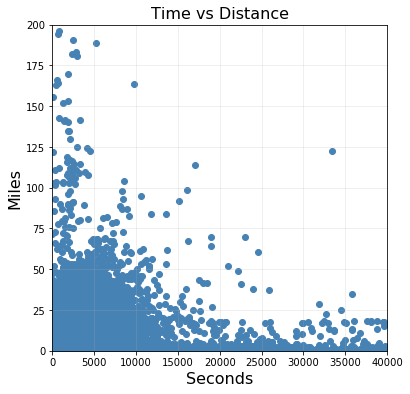

In [8]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
axes.scatter(dfMerged["trip_seconds"], dfMerged["trip_miles"], color = "steelblue")
plt.xlim(0,40000)
plt.ylim(0,)
axes.grid(alpha=0.25)
axes.set_xlabel("Seconds", fontsize=16)
axes.set_ylabel("Miles", fontsize=16)
axes.set_title("Time vs Distance", fontsize=16)
plt.xlim(0,40000)
plt.ylim(0,200)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
axes.scatter(dfMerged["trip_seconds"], dfMerged["trip_miles"], color = "steelblue",s=0.1)
plt.xlim(0,40000)
plt.ylim(0,)
axes.grid(alpha=0.25)
axes.set_xlabel("Seconds", fontsize=16)
axes.set_ylabel("Miles", fontsize=16)
axes.set_title("Time vs Distance", fontsize=16)
plt.xlim(0,3600)
plt.ylim(0,50)

In [5]:
dfSoc = pd.read_csv("data/chicago_census.csv")
dfSoc.columns = ["community_area_number","community_area_name","percent_housing_crowded","percent_households_below_poverty","percent_aged_16_unemployed","percent_aged_25_no_highschool","percent_non_working_age","income","hardship"]
dfSoc.dropna(inplace = True)
dfSoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
community_area_number               77 non-null float64
community_area_name                 78 non-null object
percent_housing_crowded             78 non-null float64
percent_households_below_poverty    78 non-null float64
percent_aged_16_unemployed          78 non-null float64
percent_aged_25_no_highschool       78 non-null float64
percent_non_working_age             78 non-null float64
income                              78 non-null int64
hardship                            77 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


In [20]:
dfOct.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,2059.0,2016-10-2 16:45:00,2016-10-2 17:15:00,2460.0,17.4,NaN,313.0,32.0,76.0,43.50,0.0,0.0,5.0,48.50,Credit Card,10.0,18.0,610.0,225.0,6.0
1,6308.0,2016-10-26 11:30:00,2016-10-26 12:00:00,1860.0,14.9,NaN,960.0,7.0,56.0,38.00,8.2,0.0,3.0,49.20,Credit Card,101.0,618.0,407.0,433.0,757.0
2,2595.0,2016-10-21 12:00:00,2016-10-21 12:15:00,420.0,1.0,NaN,911.0,8.0,8.0,6.25,3.0,0.0,0.0,9.25,Credit Card,101.0,754.0,410.0,688.0,206.0
3,6764.0,2016-10-21 23:15:00,2016-10-21 23:30:00,240.0,0.8,NaN,16.0,8.0,32.0,5.50,0.0,0.0,2.0,7.50,Cash,NaN,754.0,410.0,18.0,610.0
4,3824.0,2016-10-2 00:00:00,2016-10-2 00:15:00,600.0,1.8,NaN,13.0,32.0,8.0,8.75,0.0,0.0,1.0,9.75,Cash,101.0,18.0,610.0,474.0,204.0


In [12]:
#for income data 
#if we add a column for dest income and pickup income, we could investigate if people tend to 
#take taxis to areas with a similar income level 

In [13]:
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [155]:
dfOctS = dfOct.merge(dfSoc,how = "inner", left_on = "pickup_community_area", right_on = "community_area_number")
dfOctA = dfOct.merge(dfSoc,how = "inner", left_on = "dropoff_community_area", right_on = "community_area_number")

In [18]:
dfOctS.corr()

,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,community_area_number,percent_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_no_highschool,percent_non_working_age,income,hardship
trip_seconds,1.000000,0.570653,0.344057,0.230611,0.415198,0.410522,0.344057,0.152084,-0.002006,0.054722,0.213948,0.260768,-0.272390,0.264039
trip_miles,0.570653,1.000000,0.453202,0.314940,0.513653,0.534202,0.453202,0.198642,-0.007810,0.065911,0.268170,0.338920,-0.348254,0.335689
pickup_community_area,0.344057,0.453202,1.000000,0.057868,0.276392,0.393926,1.000000,0.334901,0.264572,0.161657,0.474210,0.225253,-0.728643,0.560220
dropoff_community_area,0.230611,0.314940,0.057868,1.000000,0.200690,0.209189,0.057868,0.010918,0.039383,0.043625,0.005290,-0.005784,0.006850,0.010161
fare,0.415198,0.513653,0.276392,0.200690,1.000000,0.329913,0.276392,0.123020,-0.004328,0.048687,0.171513,0.214000,-0.216899,0.212229
tips,0.410522,0.534202,0.393926,0.209189,0.329913,1.000000,0.393926,0.130443,-0.029232,0.037132,0.189349,0.254402,-0.260807,0.242554
community_area_number,0.344057,0.453202,1.000000,0.057868,0.276392,0.393926,1.000000,0.334901,0.264572,0.161657,0.474210,0.225253,-0.728643,0.560220
percent_housing_crowded,0.152084,0.198642,0.334901,0.010918,0.123020,0.130443,0.334901,1.000000,0.636879,0.703163,0.796271,0.567079,-0.594614,0.806590
percent_households_below_poverty,-0.002006,-0.007810,0.264572,0.039383,-0.004328,-0.029232,0.264572,0.636879,1.000000,0.603567,0.453228,0.029303,-0.489842,0.510877
percent_aged_16_unemployed,0.054722,0.065911,0.161657,0.043625,0.048687,0.037132,0.161657,0.703163,0.603567,1.000000,0.646757,0.596399,-0.396147,0.669415


In [225]:
dfMerged.loc[dfMerged["pickup_community_area"] == dfMerged["dropoff_community_area"]].count()/dfMerged.count()

trip_start_timestamp      0.236672
trip_end_timestamp        0.236672
trip_seconds              0.236672
trip_miles                0.236672
pickup_community_area     0.236672
dropoff_community_area    0.236672
fare                      0.236672
tips                      0.236672
payment_type              0.236672
dtype: float64

In [103]:
dfMerged.loc[(dfMerged["payment_type"] == "Credit Card") & (dfMerged["tips"] == 0.0)].count()

trip_start_timestamp      60772
trip_end_timestamp        60772
trip_seconds              60772
trip_miles                60772
pickup_community_area     60772
dropoff_community_area    60772
fare                      60772
tips                      60772
payment_type              60772
dtype: int64

In [ ]:
dfMerged["payment_type"].head()

In [13]:
dfSoc.head(20)

,community_area_number,community_area_name,percent_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_no_highschool,percent_non_working_age,income,hardship
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
5,6.0,Lake View,1.1,11.4,4.7,2.6,17.0,60058,5.0
6,7.0,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551,2.0
7,8.0,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
8,9.0,Edison Park,1.1,3.3,6.5,7.4,35.3,40959,8.0
9,10.0,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875,21.0


In [217]:
#Relim Frequent pattern mining algorithm 
transaction_tuples  = dfMerged[['pickup_community_area', 'dropoff_community_area']].apply(tuple, axis=1)
relim_input = itemmining.get_relim_input(transaction_tuples)
report = itemmining.relim(relim_input, min_support=10000)
report

{frozenset({25.0}): 10241,
 frozenset({12.0}): 10911,
 frozenset({43.0}): 10944,
 frozenset({42.0}): 11282,
 frozenset({38.0}): 13662,
 frozenset({19.0}): 14255,
 frozenset({13.0}): 16186,
 frozenset({10.0}): 21562,
 frozenset({60.0}): 23500,
 frozenset({23.0}): 26484,
 frozenset({11.0}): 30441,
 frozenset({39.0}): 30911,
 frozenset({15.0}): 31501,
 frozenset({35.0}): 42290,
 frozenset({32.0, 35.0}): 12964,
 frozenset({34.0}): 46434,
 frozenset({32.0, 34.0}): 13546,
 frozenset({8.0, 34.0}): 12009,
 frozenset({31.0}): 47956,
 frozenset({31.0, 32.0}): 12060,
 frozenset({8.0, 31.0}): 10980,
 frozenset({14.0}): 63724,
 frozenset({21.0}): 74857,
 frozenset({6.0, 21.0}): 13248,
 frozenset({8.0, 21.0}): 12551,
 frozenset({2.0}): 80633,
 frozenset({16.0}): 97341,
 frozenset({6.0, 16.0}): 16890,
 frozenset({8.0, 16.0}): 11318,
 frozenset({1.0}): 103139,
 frozenset({1.0, 77.0}): 15164,
 frozenset({1.0, 6.0}): 10983,
 frozenset({1.0, 8.0}): 12400,
 frozenset({41.0}): 107567,
 frozenset({32.0, 41.

In [215]:
#fact check on frequent itemset 8,32 
dfMerged.loc[((dfMerged["pickup_community_area"] == 8) | (dfMerged["dropoff_community_area"] == 8)) & ((dfMerged["pickup_community_area"] == 32) | (dfMerged["dropoff_community_area"] == 32))].count()

trip_start_timestamp      524036
trip_end_timestamp        524036
trip_seconds              524036
trip_miles                524036
pickup_community_area     524036
dropoff_community_area    524036
fare                      524036
tips                      524036
payment_type              524036
theoretical_fare          524036
dtype: int64

In [218]:
#https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
import operator
sorted_frequent_itemsets = sorted(report.items(), key=operator.itemgetter(1))
sorted_frequent_itemsets.reverse()

In [219]:
#mostly seems to be clustered around central/downtown chicago 
#notable exceptions are 8/76 and 8/56 which are near north side to airport
#interesting note: max income area is max ride count
sorted_frequent_itemsets


#knowledge gained - if a driver wants to be driving in a certain area, taking rides from other areas
# have a different probability of getting them to that area 

[(frozenset({8.0}), 7185657),
 (frozenset({32.0}), 5456296),
 (frozenset({28.0}), 2430528),
 (frozenset({8.0, 32.0}), 2281451),
 (frozenset({6.0}), 1457526),
 (frozenset({7.0}), 1302409),
 (frozenset({76.0}), 1300251),
 (frozenset({8.0, 28.0}), 899440),
 (frozenset({24.0}), 887932),
 (frozenset({28.0, 32.0}), 814120),
 (frozenset({33.0}), 752962),
 (frozenset({7.0, 8.0}), 475912),
 (frozenset({8.0, 76.0}), 453597),
 (frozenset({56.0}), 410104),
 (frozenset({3.0}), 395483),
 (frozenset({6.0, 8.0}), 391833),
 (frozenset({32.0, 76.0}), 342740),
 (frozenset({22.0}), 308842),
 (frozenset({8.0, 24.0}), 303845),
 (frozenset({32.0, 33.0}), 274183),
 (frozenset({8.0, 33.0}), 259442),
 (frozenset({77.0}), 252359),
 (frozenset({7.0, 32.0}), 226189),
 (frozenset({6.0, 32.0}), 207092),
 (frozenset({5.0}), 178083),
 (frozenset({6.0, 7.0}), 169686),
 (frozenset({24.0, 32.0}), 148142),
 (frozenset({4.0}), 141115),
 (frozenset({8.0, 56.0}), 139746),
 (frozenset({32.0, 56.0}), 107942),
 (frozenset({41.0

In [95]:
#dfRideCount = pd.DataFrame()
dfRideCount = pd.DataFrame(dfSoc["community_area_number"])
#dfRideCount["total_count"] = dfMerged.loc(dfMerged["pickup_community_area"] == dfRideCount["area"]) | (dfMerged["dropoff_community_area"] == dfRideCount["area"]).count()

In [141]:
dfRideCount.head()
dfMerged.reset_index()
dfSoc.reset_index

<bound method DataFrame.reset_index of     community_area_number     community_area_name  percent_housing_crowded  \
0                     1.0             Rogers Park                      7.7   
1                     2.0              West Ridge                      7.8   
2                     3.0                  Uptown                      3.8   
3                     4.0          Lincoln Square                      3.4   
4                     5.0            North Center                      0.3   
5                     6.0               Lake View                      1.1   
6                     7.0            Lincoln Park                      0.8   
7                     8.0         Near North Side                      1.9   
8                     9.0             Edison Park                      1.1   
9                    10.0            Norwood Park                      2.0   
10                   11.0          Jefferson Park                      2.7   
11                   12.0

In [105]:
dfRideCount["count"] = 0

In [229]:
def merge_ride_count(row):
    count = dfMerged.loc[(dfMerged["pickup_community_area"] == row) | (dfMerged["dropoff_community_area"] == row)]["fare"].count()
    return count

def merge_ride_mean(row):
    mean = dfMerged.loc[(dfMerged["pickup_community_area"] == row) | (dfMerged["dropoff_community_area"] == row)]["tips"].mean()
    return mean

In [230]:

dfSoc["count"] = dfSoc["community_area_number"].apply(merge_ride_count)
dfSoc["mean"] = dfSoc["community_area_number"].apply(merge_ride_mean)

In [221]:
stats.linregress(dfSoc["income"],dfSoc["count"])

LinregressResult(slope=49.700421819321768, intercept=-965122.97524633072, rvalue=0.70798607554616944, pvalue=6.0018715359537301e-13, stderr=5.7246464503555901)

49.7004218193 -965122.975246 0.707986075546


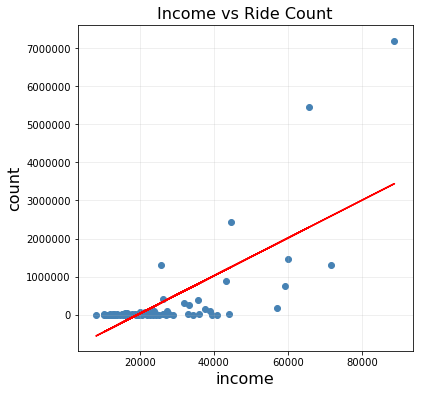

In [222]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
slope, intercept, rvalue, pvalue, stderr = stats.linregress(dfSoc["income"],dfSoc["count"])
#Create regression line from formula
y = slope * dfSoc['income'].copy() + intercept
x = dfSoc['income'].copy()
axes.plot(x,y, color='red',label="Income vs. Ride Count")


axes.scatter(dfSoc["income"], dfSoc["count"], color = "steelblue")
axes.grid(alpha=0.25)
axes.set_xlabel("income", fontsize=16)
axes.set_ylabel("count", fontsize=16)
axes.set_title("Income vs Ride Count", fontsize=16)
print(slope, intercept,rvalue)

In [232]:
dfMerged.corr()

,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips
trip_seconds,1.000000,0.143326,0.322411,0.217770,0.449023,0.393684
trip_miles,0.143326,1.000000,0.112854,0.074760,0.143154,0.127045
pickup_community_area,0.322411,0.112854,1.000000,0.070415,0.302682,0.375512
dropoff_community_area,0.217770,0.074760,0.070415,1.000000,0.217772,0.193339
fare,0.449023,0.143154,0.302682,0.217772,1.000000,0.362834
tips,0.393684,0.127045,0.375512,0.193339,0.362834,1.000000
